In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from ecgdetectors import Detectors
import seaborn as sns
import scipy.stats as stats

# Import data

In [2]:
data_dir = Path('Cases/Cases')

data_dict = {}

for i in range(1,8):
    if i!=6:
        patient_id_healthy = 'Case_'+str(i)+'_healthy.txt'
        patient_id_diseased = 'Case_'+str(i)+'_diseased.txt'

    else:
        patient_id_healthy = 'Case_'+str(i)+'_healthy_difficult.txt'
        patient_id_diseased = 'Case_'+str(i)+'_diseased_difficult.txt'
    
    
     
    #  healthy
    case_id_health = pd.read_csv(
    data_dir / patient_id_healthy,
    sep= '\t',
    index_col=None
    )
    data_dict[('Case ' + str(i), 'healthy')] = case_id_health.drop(case_id_health.index[0])
    

    #  diseased
    case_id_diseased = pd.read_csv(
    data_dir / patient_id_diseased,
    sep= '\t',
    index_col=None
    )
    data_dict[('Case ' + str(i), 'diseased')] = case_id_diseased.drop(case_id_diseased.index[0])


# Calculate r peaks

In [3]:
fs=1000 # sample freq

detectors = Detectors(fs)

r_peaks_dict = {}

for i in range(1,8):
    #  healthy
    ECG_signal = data_dict[('Case ' + str(i), 'healthy')]['I']
    r_peaks_dict[('Case ' + str(i), 'healthy')] = detectors.two_average_detector(ECG_signal)
    
    #  diseased
    ECG_signal = data_dict[('Case ' + str(i), 'diseased')]['I']
    r_peaks_dict[('Case ' + str(i), 'diseased')] = detectors.two_average_detector(ECG_signal)

# Draw signals and r peaks

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

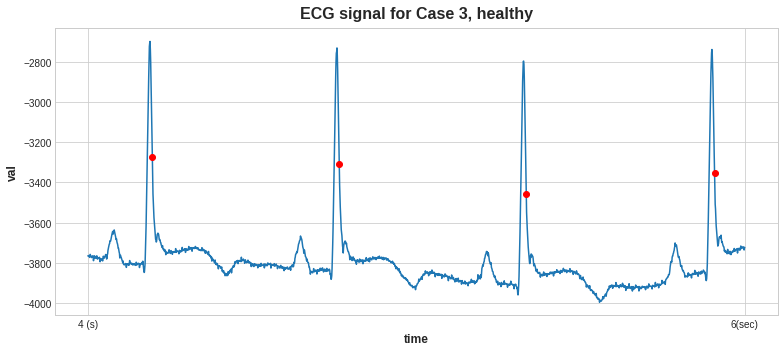

In [5]:
# for i in range(1,8):
#     #  healthy
#     r_peaks= np.asarray(r_peaks_dict[('Case ' + str(i), 'healthy')])
    
#     plt.figure()
#     plt.title('ECG signal for ' + 'Case ' + str(i) + ', healthy')
#     plt.xlabel("sample")
#     plt.ylabel("val")
    
#     plt.plot(data_dict[('Case ' + str(i), 'healthy')]['I'])
#     plt.plot(r_peaks, data_dict[('Case ' + str(i), 'healthy')]['I'][r_peaks], 'ro')
    

    
#     #  diseased
#     r_peaks= np.asarray(r_peaks_dict[('Case ' + str(i), 'diseased')])
    
#     plt.figure()
#     plt.title('ECG signal for ' + 'Case ' + str(i) + ', diseased')
#     plt.xlabel("sample")
#     plt.ylabel("val")
    
#     plt.plot(data_dict[('Case ' + str(i), 'diseased')]['I'])
#     plt.plot(r_peaks, data_dict[('Case ' + str(i), 'diseased')]['I'][r_peaks], 'ro')

# a part of case 3 healthy
l_bound = 4000
u_bound = 6000
r_peaks= np.asarray(r_peaks_dict[('Case ' + str(3), 'healthy')][6:10])
plt.title('ECG signal for ' + 'Case ' + str(3) + ', healthy')
plt.xlabel("time")
plt.ylabel("val")

plt.plot(data_dict[('Case ' + str(3), 'healthy')]['I'][l_bound:u_bound])
plt.plot(r_peaks, data_dict[('Case ' + str(3), 'healthy')]['I'][r_peaks], 'ro')

h_axis = np.array([l_bound, u_bound])
my_xticks = ['4 (s)', '6(sec)']
plt.xticks(h_axis, my_xticks);

# Calculate heart rate based on r peaks

In [6]:
fs=1000 # sample freq

def HR(r_peaks):
    
    r_peaks_intervals = np.diff(r_peaks)
    r_peaks_intervals_time = r_peaks_intervals/float(fs)  # in second
    heart_rates = 60.0/r_peaks_intervals_time
    
    mean = np.mean(heart_rates)
    std = np.std(heart_rates)

    return heart_rates, mean, std

In [7]:
HR_dict = {}
for i in range(1,8):
    #  healthy
    HR_dict[('Case ' + str(i), 'healthy', 'values')], \
    HR_dict[('Case ' + str(i), 'healthy', 'mean')], \
    HR_dict[('Case ' + str(i), 'healthy', 'std')] = HR(r_peaks_dict[('Case ' + str(i), 'healthy')])
    
    #  diseased
    HR_dict[('Case ' + str(i), 'diseased', 'values')], \
    HR_dict[('Case ' + str(i), 'diseased', 'mean')], \
    HR_dict[('Case ' + str(i), 'diseased', 'std')] = HR(r_peaks_dict[('Case ' + str(i), 'diseased')])

# Visualizing the changing heart rate

Text(0, 0.5, 'val')

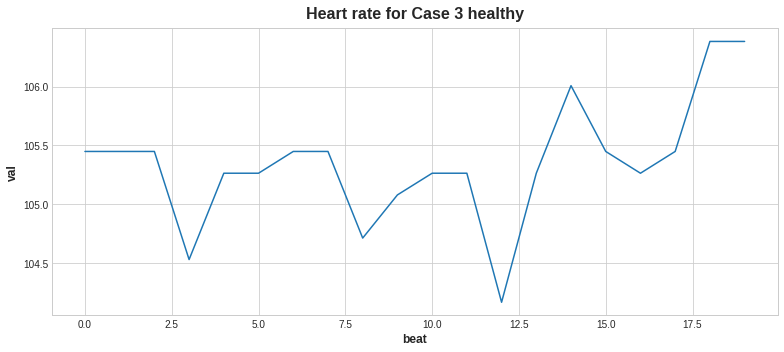

In [8]:
# for i in range(1,8):
#     #  healthy
#     HR = np.asarray(HR_dict[('Case ' + str(i), 'healthy', 'values')])
    
#     plt.figure()
#     plt.title('Heart rate for ' + 'Case ' + str(i) + ', healthy')
#     plt.xlabel("beat")
#     plt.ylabel("val")
    
#     plt.plot(range(len(HR)), HR)
    

    
#     #  diseased
#     HR = np.asarray(HR_dict[('Case ' + str(i), 'diseased', 'values')])
    
#     plt.figure()
#     plt.title('Heart rate for ' + 'Case ' + str(i) + ', diseased')
#     plt.xlabel("beat")
#     plt.ylabel("val")
    
#     plt.plot(range(len(HR)), HR)

# case 3 healthy
HR = np.asarray(HR_dict[('Case ' + str(3), 'healthy', 'values')])
plt.plot(range(len(HR)), HR)
plt.title('Heart rate for Case 3 healthy')
plt.xlabel("beat")
plt.ylabel("val")

# Show in the differences in heart rates among different files

In [9]:
mean_vec_healthy = np.zeros(7)
mean_vec_diseased = np.zeros(7)
std_vec_healthy = np.zeros(7)
std_vec_diseased = np.zeros(7)

for i in range(1,8):
    #  healthy
    mean_vec_healthy[i-1] = HR_dict[('Case ' + str(i), 'healthy', 'mean')]
    std_vec_healthy[i-1] = HR_dict[('Case ' + str(i), 'healthy', 'std')]
    
    #  diseased
    mean_vec_diseased[i-1] = HR_dict[('Case ' + str(i), 'diseased', 'mean')]
    std_vec_diseased[i-1] = HR_dict[('Case ' + str(i), 'diseased', 'std')]


/home/amin/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


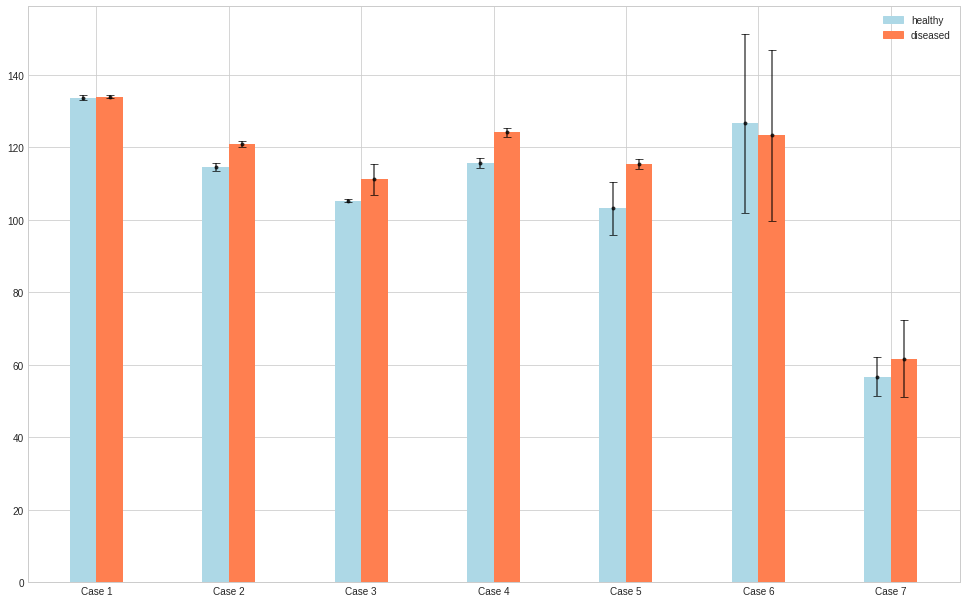

In [10]:
X = np.arange(7)

fig = plt.figure(figsize=(12.944,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, mean_vec_healthy, color = 'lightblue', width = 0.2)  
plt.errorbar(X + 0.00, mean_vec_healthy, std_vec_healthy, fmt='.', color='Black', alpha=0.7, capsize = 4)

ax.bar(X + 0.2, mean_vec_diseased, color = 'coral', width = 0.2)  
plt.errorbar(X + 0.2, mean_vec_diseased, std_vec_diseased, fmt='.', color='Black', alpha=0.7, capsize = 4)

colors = {'healthy':'lightblue', 'diseased':'coral'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

h_axis = np.array([.1, 1.1, 2.1, 3.1, 4.1, 5.1, 6.1])
my_xticks = ['Case 1', 'Case 2', 'Case 3', 'Case 4', 'Case 5', 'Case 6', 'Case 7']
plt.xticks(h_axis, my_xticks);

# Showing whether the 'disease' affects the heart rate

/tmp/ipykernel_30739/2542977503.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
/tmp/ipykernel_30739/2542977503.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
/tmp/ipykernel_30739/2542977503.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
/tmp/ipykernel_30739/2542977503.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2, ignore_index=True)
/tmp/ipykernel_30739/2542977503.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use

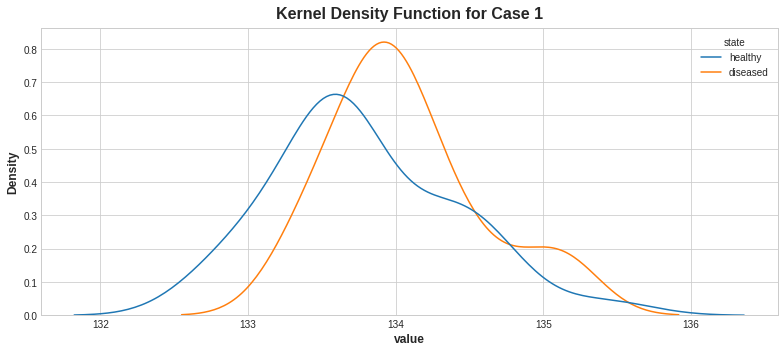

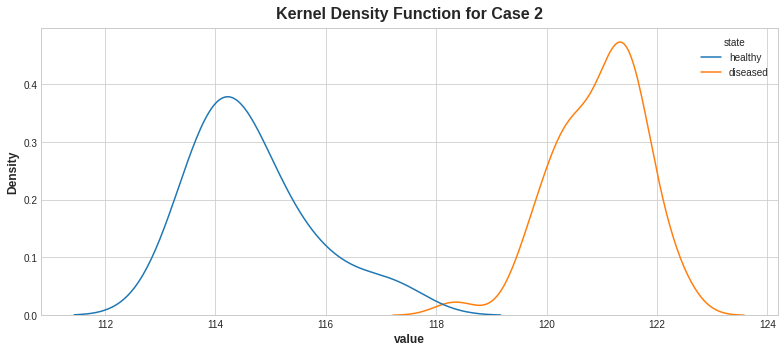

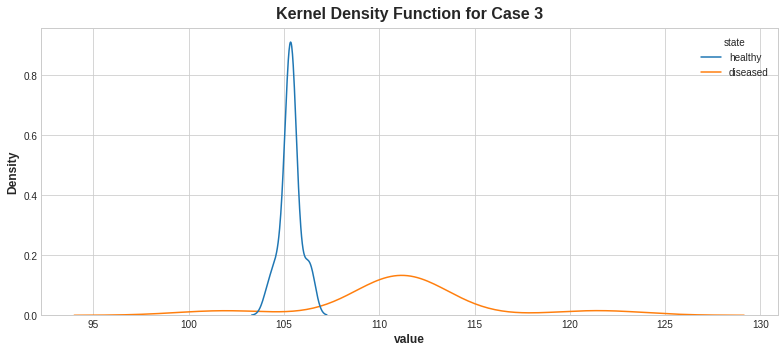

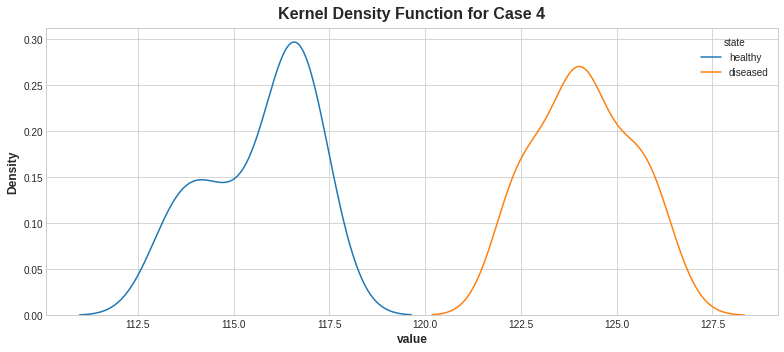

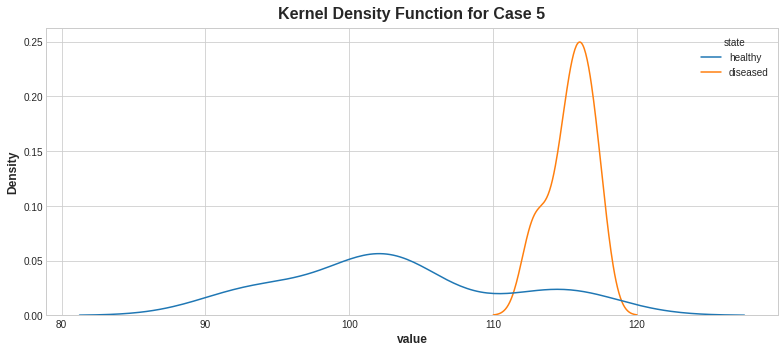

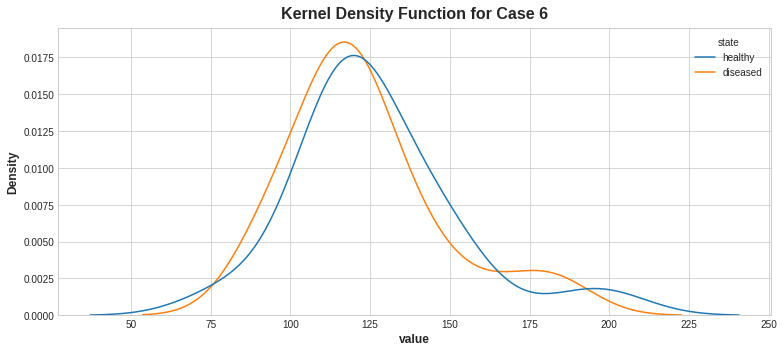

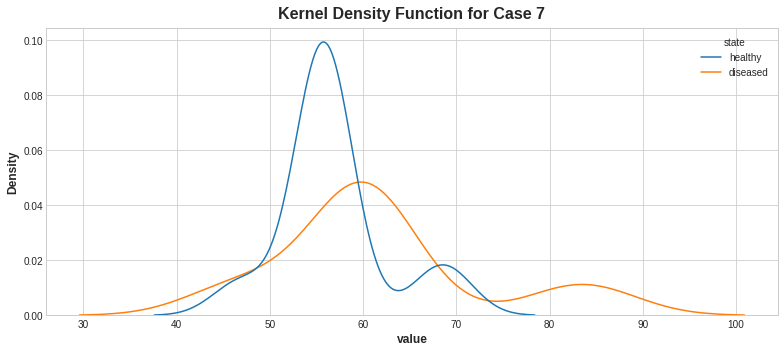

In [11]:
for i in range(1,8):
    df =  pd.DataFrame(columns = ['state', 'value'])
    df2 =  pd.DataFrame(columns = ['state', 'value'])

    df.loc[:, 'value'] = HR_dict[('Case ' + str(i), 'healthy', 'values')]
    df.loc[:, 'state'] = 'healthy'


    df2.loc[:, 'value'] =  HR_dict[('Case ' + str(i), 'diseased', 'values')]
    df2.loc[:, 'state'] = 'diseased'


    df = df.append(df2, ignore_index=True)
    # df.head(-1)
    
    plt.figure()
    sns.kdeplot(x='value', data=df, hue='state', common_norm=False);
    plt.title("Kernel Density Function for " + 'Case ' + str(i));
    
    


# Statistical test to find out whether the 'disease' affects the heart rate

In [12]:
for i in range(1,8):
    print( 'case ', i)
  
   
    stat, p_value = stats.ttest_ind(HR_dict[('Case ' + str(i), 'healthy', 'values')],
                                    HR_dict[('Case ' + str(i), 'diseased', 'values')])
    print(f"t-test: statistic={stat:.4f}, p-value={p_value:.4f}")
    


case  1
t-test: statistic=-1.9159, p-value=0.0601
case  2
t-test: statistic=-22.2009, p-value=0.0000
case  3
t-test: statistic=-5.9626, p-value=0.0000
case  4
t-test: statistic=-21.2287, p-value=0.0000
case  5
t-test: statistic=-8.3706, p-value=0.0000
case  6
t-test: statistic=0.4090, p-value=0.6850
case  7
t-test: statistic=-1.8713, p-value=0.0680
